<a href="https://colab.research.google.com/github/andrewzhai/ASOS_project_haoyang/blob/master/Data_augmentaion_and_confient_learning_RASA_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Git and Install Packages

augumented 20  chose (1-10)

In [1]:
!git clone https://github.com/andrewzhai/ASOS_project_haoyang.git

Cloning into 'ASOS_project_haoyang'...
remote: Enumerating objects: 3895, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 3895 (delta 43), reused 52 (delta 42), pack-reused 3841
Receiving objects: 100% (3895/3895), 252.02 MiB | 37.05 MiB/s, done.
Resolving deltas: 100% (1796/1796), done.
Checking out files: 100% (3352/3352), done.


In [2]:
%cd /content/ASOS_project_haoyang/RASA_asos/ayo-faq

/content/ASOS_project_haoyang/RASA_asos/ayo-faq


In [3]:
# Install requirements
!pip3 install -r requirements.txt -q
!pip3 install "prompt_toolkit==2.0.1" -q
!pip3 install -U ipython -q

     |████████████████████████████████| 689 kB 9.6 MB/s 
     |████████████████████████████████| 70 kB 10.1 MB/s 
     |████████████████████████████████| 340 kB 31.4 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 457 kB 59.9 MB/s 
     |████████████████████████████████| 40 kB 6.1 MB/s 
     |████████████████████████████████| 104 kB 60.6 MB/s 
     |████████████████████████████████| 3.0 MB 51.3 MB/s 
     |████████████████████████████████| 131 kB 62.6 MB/s 
     |████████████████████████████████| 128 kB 66.9 MB/s 
     |████████████████████████████████| 459 kB 44.5 MB/s 
     |████████████████████████████████| 662 kB 63.2 MB/s 
     |████████████████████████████████| 51 kB 720 kB/s 
     |████████████████████████████████| 298 kB 74.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.3 MB 35.5 MB/s 
     |████████████████████

In [4]:
!pip3 install rasa[convert]

# RASA train for T5 Data augmentation

## AD - Pipeline 1: no pre-trained word embeddings (CountVectorsFeaturizer + DIETClassifier)

In [ ]:
# Printing config file
ConfigFile_path = "/content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read())

# https://rasa.com/docs/rasa/tuning-your-model/
# Does NOT use pre-trained word embeddings: CountVectorsFeaturizer trains only on given training data

language: en
pipeline:
#   - name: WhitespaceTokenizer
#   - name: CountVectorsFeaturizer
#   - name: CountVectorsFeaturizer
#     analyzer: char_wb
#     min_ngram: 1
#     max_ngram: 4
#   - name: DIETClassifier
#     epochs: 100
  - name: WhitespaceTokenizer
  - name: RegexFeaturizer
  - name: LexicalSyntacticFeaturizer
  - name: CountVectorsFeaturizer
  - name: CountVectorsFeaturizer
    analyzer: char_wb
    min_ngram: 1
    max_ngram: 4
  - name: DIETClassifier
    epochs: 100
    # constrain_similarities: True
    # model_confidence: linear_norm
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100
    retrieval_intent: faq   # Added
    # constrain_similarities: True
    # model_confidence: linear_norm
  # - name: FallbackClassifier
  #   threshold: 0.3
  #   ambiguity_threshold: 0.1


In [ ]:
for i in range(1,6):
# input original data for comparsion
  !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{i}cv_original_train.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/enter_location_you_like/T5models/{i}cv_p1_0

 
 

 
for j in range(1,6):
  for i in range(1,11):

    
      
    !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/cv_T5_augmented_data/{j}cv_{i}augumented_fixed.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/enter_location_you_like/T5models/{j}cv_p1_{i}




2021-08-25 21:33:07.651819: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-08-25 21:33:07.677464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 21:33:07.678035: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-25 21:33:07.678084: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-08-25 21:33:07.679804: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-08-25 21:33:07.681408: I tensorflow/stream_executor/platform/default/d


## AD - Pipeline 2: Using DIET with pre-trained word embeddings (ConveRTFeaturizer)



In [ ]:
# Printing config file
ConfigFile_path = "/content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET-PreTrained.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read())  

# https://rasa.com/docs/rasa/tuning-your-model/
# DOES use pre-trained word embeddings: ConveRT model is trained on English corpus of conversations

language: en
pipeline:
  - name: WhitespaceTokenizer
  - name: ConveRTFeaturizer # contains pre-trained word embeddings
    model_url: https://github.com/connorbrinton/polyai-models/releases/download/v1.0/model.tar.gz
  - name: CountVectorsFeaturizer
    analyzer: char_wb
    min_ngram: 1
    max_ngram: 4
  - name: DIETClassifier
    epochs: 100
    # constrain_similarities: True
    # model_confidence: linear_norm
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100
    retrieval_intent: faq   # Added
    # constrain_similarities: True
    # model_confidence: linear_norm
  # - name: FallbackClassifier
  #   threshold: 0.3
  #   ambiguity_threshold: 0.1


In [ ]:



for i in range(1,6):
# input original data for comparsion
  !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{i}cv_original_train.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET-PreTrained.yml --out models --fixed-model-name /content/enter_location_you_like/T5models/{i}cv_p2_0

 
 

 
for j in range(1,6):
  for i in range(1,11):

    
      
    !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/cv_T5_augmented_data/{j}cv_{i}augumented_fixed.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET-PreTrained.yml --out models --fixed-model-name /content/enter_location_you_like/T5models/{j}cv_p2_{i}









## AD - Pipeline 3: Using pre-trained BERT language model (Bert tokenizer/featurizer + DIETClassifier)

In [1]:
# Printing config file
ConfigFile_path = "/content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-BERT.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read()) 

# https://rasa.com/docs/rasa/tuning-your-model/
# Uses pre-trained BERT language model (not fine-tuned)


language: en
pipeline:
  - name: LanguageModelTokenizer
  - name: LanguageModelFeaturizer
    # Name of the language model to use
    model_name: "bert"
    # Pre-Trained weights to be loaded
    model_weights: "rasa/LaBSE"

    # An optional path to a specific directory to download and cache the pre-trained model weights.
    # The `default` cache_dir is the same as https://huggingface.co/transformers/serialization.html#cache-directory .
    cache_dir: null
  - name: DIETClassifier
    epochs: 100
    # constrain_similarities: True
    # model_confidence: linear_norm
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100
    retrieval_intent: faq   # Added
    # constrain_similarities: True
    # model_confidence: linear_norm
  # - name: FallbackClassifier
  #   threshold: 0.3
  #   ambiguity_threshold: 0.1

# language: en
# pipeline:
# - name: HFTransformersNLP


In [2]:
!pip install transformers

In [3]:
!pip install numpy==1.19.5

In [ ]:


for i in range(1,6):
# input original data for comparsion
  !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{i}cv_original_train.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-BERT.yml --out models --fixed-model-name /content/enter_location_you_like/T5models/{i}cv_p3_0

 
 
# input T5_augmented_data
 
for j in range(1,6):
  for i in range(1,11):

    # !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cl/{j}cv_{i}.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p1_{i}
      
    !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/cv_T5_augmented_data/{j}cv_{i}augumented_fixed.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-BERT.yml --out models --fixed-model-name /content/enter_location_you_like/T5models/{j}cv_p3_{i}






# RASA train for GPT3 Data augmentation

## AD - Pipeline 1: no pre-trained word embeddings (CountVectorsFeaturizer + DIETClassifier)

In [5]:
# Printing config file
ConfigFile_path = "/content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read())

# https://rasa.com/docs/rasa/tuning-your-model/
# Does NOT use pre-trained word embeddings: CountVectorsFeaturizer trains only on given training data

language: en
pipeline:
#   - name: WhitespaceTokenizer
#   - name: CountVectorsFeaturizer
#   - name: CountVectorsFeaturizer
#     analyzer: char_wb
#     min_ngram: 1
#     max_ngram: 4
#   - name: DIETClassifier
#     epochs: 100
  - name: WhitespaceTokenizer
  - name: RegexFeaturizer
  - name: LexicalSyntacticFeaturizer
  - name: CountVectorsFeaturizer
  - name: CountVectorsFeaturizer
    analyzer: char_wb
    min_ngram: 1
    max_ngram: 4
  - name: DIETClassifier
    epochs: 100
    # constrain_similarities: True
    # model_confidence: linear_norm
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100
    retrieval_intent: faq   # Added
    # constrain_similarities: True
    # model_confidence: linear_norm
  # - name: FallbackClassifier
  #   threshold: 0.3
  #   ambiguity_threshold: 0.1


In [ ]:
for i in range(1,6):
# input original data for comparsion
  !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{i}cv_original_train.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/enter_location_you_like/gpt3models/{i}cv_p1_0

 
 
# input gpt3_augmented_data
 
for j in range(1,6):
  for i in range(1,11):

    # !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cl/{j}cv_{i}.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p1_{i}
      
    !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/gpt3_augmented_data/{j}cv_{i}augumented_fixed.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/enter_location_you_like/gpt3models/{j}cv_p1_{i}





## AD - Pipeline 2: Using DIET with pre-trained word embeddings (ConveRTFeaturizer)



In [1]:
# Printing config file
ConfigFile_path = "/content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET-PreTrained.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read())  

# https://rasa.com/docs/rasa/tuning-your-model/
# DOES use pre-trained word embeddings: ConveRT model is trained on English corpus of conversations

language: en
pipeline:
  - name: WhitespaceTokenizer
  - name: ConveRTFeaturizer # contains pre-trained word embeddings
    model_url: https://github.com/connorbrinton/polyai-models/releases/download/v1.0/model.tar.gz
  - name: CountVectorsFeaturizer
    analyzer: char_wb
    min_ngram: 1
    max_ngram: 4
  - name: DIETClassifier
    epochs: 100
    # constrain_similarities: True
    # model_confidence: linear_norm
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100
    retrieval_intent: faq   # Added
    # constrain_similarities: True
    # model_confidence: linear_norm
  # - name: FallbackClassifier
  #   threshold: 0.3
  #   ambiguity_threshold: 0.1


In [ ]:



for i in range(1,6):
# input original data for comparsion
  !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{i}cv_original_train.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET-PreTrained.yml --out models --fixed-model-name /content/enter_location_you_like/gpt3models/{i}cv_p2_0

 
 
# input gpt3_augmented_data
 
for j in range(1,6):
  for i in range(1,11):

    # !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cl/{j}cv_{i}.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p1_{i}
      
    !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/gpt3_augmented_data/{j}cv_{i}augumented_fixed.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-DIET-PreTrained.yml --out models --fixed-model-name /content/enter_location_you_like/gpt3models/{j}cv_p2_{i}









2021-08-25 17:34:42.675729: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-08-25 17:34:42.702986: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 17:34:42.703570: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-25 17:34:42.703615: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-08-25 17:34:42.705382: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-08-25 17:34:42.707029: I tensorflow/stream_executor/platform/default/d

## AD - Pipeline 3: Using pre-trained BERT language model (Bert tokenizer/featurizer + DIETClassifier)

In [28]:
# Printing config file
ConfigFile_path = "/content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-BERT.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read()) 

# https://rasa.com/docs/rasa/tuning-your-model/
# Uses pre-trained BERT language model (not fine-tuned)
language: en
pipeline:
  - name: LanguageModelTokenizer
  - name: LanguageModelFeaturizer
    # Name of the language model to use
    model_name: "bert"
    # Pre-Trained weights to be loaded
    model_weights: "rasa/LaBSE"

    # An optional path to a specific directory to download and cache the pre-trained model weights.
    # The `default` cache_dir is the same as https://huggingface.co/transformers/serialization.html#cache-directory .
    cache_dir: null
  - name: DIETClassifier
    epochs: 100
    # constrain_similarities: True
    # model_confidence: linear_norm
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100
    retrieval_intent: faq   # Added
    # constrain_similarities: True
    # model_confidence: linear_norm
  # - name: FallbackClassifier
  #   threshold: 0.3
  #   ambiguity_threshold: 0.1

# language: en
# pipeline:
# - name: HFTransformersNLP
# 

In [29]:
!pip install transformers

In [ ]:
!pip install numpy==1.19.5

In [ ]:


for i in range(1,6):
# input original data for comparsion
  !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{i}cv_original_train.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-BERT.yml --out models --fixed-model-name /content/enter_location_you_like/gpt3models/{i}cv_p3_0

 
 
# input gpt3_augmented_data
 
for j in range(1,6):
  for i in range(1,11):

    # !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cl/{j}cv_{i}.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p1_{i}
      
    !rasa train nlu --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/gpt3_augmented_data/{j}cv_{i}augumented_fixed.yml --config /content/ASOS_project_haoyang/RASA_asos/ayo-faq/configs/config-BERT.yml --out models --fixed-model-name /content/enter_location_you_like/gpt3models/{j}cv_p3_{i}






# RASA test




## test for T5 models

In [ ]:
for pipe in range(1,4):
  for j in range(1,6):
    for i in range(0,11):
      !rasa test nlu --model /content/enter_location_you_like/T5models/{j}cv_p{pipe}_{i}.tar.gz --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{j}cv_original_test.yml --out /content/enter_location_you_like/T5_score/cv{j}_T5_p{pipe}_{i}

## test for GPT3 models

In [ ]:
for pipe in range(1,4):
  for j in range(1,6):
    for i in range(0,11):
      !rasa test nlu --model /content/enter_location_you_like/gpt3models/{j}cv_p{pipe}_{i}.tar.gz --nlu /content/ASOS_project_haoyang/output_result_by_haoyang/data/original_data_5fold/{j}cv_original_test.yml --out /content/enter_location_you_like/gpt3_score/cv{j}_gpt_p{pipe}_{i}

# Result Plot

**need to run in order**

## Evaluate T5 augmenation 

You can train and test models yourself based on the scripts above,but it might take a quite long time. So here I provided some test results I generated in advance. 

In [19]:
import json
import numpy as np


In [20]:
accuracy_p1=[]
accuracy_p2=[]
accuracy_p3=[]
precision_p1=[]
precision_p2=[]
precision_p3=[]
f1_p1=[]
f1_p2=[]
f1_p3=[]
recall_p1=[]
recall_p2=[]
recall_p3=[]

for cv in range(1,6):
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  for i in range(1,4):
    for j in range(0,11):
# or you can insert your rasa test results by changing the path, here I am using my rasa test results
      with open('/content/ASOS_project_haoyang/rasa_test_output_for_T5/cv{}_fixedp{}_{}/intent_report.json'.format(cv,i,j)) as f:

        data = json.load(f)
        accuracy.append(data['accuracy'])
        precision.append(data['macro avg']['precision'])
        recall.append(data['macro avg']['recall'])
        f1.append(data['macro avg']['f1-score'])
  # append 1*5, get avg

  accuracy_p1.append(accuracy[0:11])
  accuracy_p2.append(accuracy[11:22])
  accuracy_p3.append(accuracy[22:])
  precision_p1.append(precision[0:11])
  precision_p2.append(precision[11:22])
  precision_p3.append(precision[22:])
  f1_p1.append(f1[0:11])
  f1_p2.append(f1[11:22])
  f1_p3.append(f1[22:])
  recall_p1.append(recall[0:11])
  recall_p2.append(recall[11:22])
  recall_p3.append(recall[22:])



In [21]:
# variance for accuracy 

accuracy_std1=np.std(np.array(accuracy_p1),axis=0)
accuracy_std2=np.std(np.array(accuracy_p2),axis=0)
accuracy_std3=np.std(np.array(accuracy_p3),axis=0)


In [22]:
accuracy_p1=np.sum(np.array(accuracy_p1),axis=0)/5
accuracy_p2=np.sum(np.array(accuracy_p2),axis=0)/5
accuracy_p3=np.sum(np.array(accuracy_p3),axis=0)/5
precision_p1=np.sum(np.array(precision_p1),axis=0)/5
precision_p2=np.sum(np.array(precision_p2),axis=0)/5
precision_p3=np.sum(np.array(precision_p3),axis=0)/5
f1_p1=np.sum(np.array(f1_p1),axis=0)/5
f1_p2=np.sum(np.array(f1_p2),axis=0)/5
f1_p3=np.sum(np.array(f1_p3),axis=0)/5
recall_p1=np.sum(np.array(recall_p1),axis=0)/5
recall_p2=np.sum(np.array(recall_p2),axis=0)/5
recall_p3=np.sum(np.array(recall_p3),axis=0)/5

In [23]:
def save(name):
  from google.colab import files

   
  plt.savefig(name)
  files.download(name)

Test result

Text(0.5, 0, 'T5 augmented sentences in Pipeline 1')

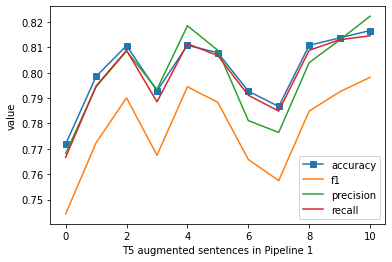

In [24]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)


plt.plot(x,accuracy_p1,marker='s')
plt.plot(x,f1_p1)
plt.plot(x,precision_p1)
plt.plot(x,recall_p1)


# plt.plot(x,f1_p1)
# plt.plot(x,recall_p1)
# plt.plot(x,precision_p1)
plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 1')
# save('CV_pipe1.png')

Text(0.5, 0, 'T5 augmented sentences in Pipeline 2')

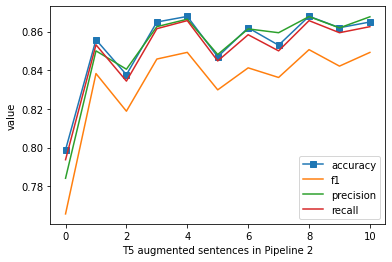

In [25]:
plt.plot(x,accuracy_p2,marker='s')
plt.plot(x,f1_p2)
plt.plot(x,precision_p2)
plt.plot(x,recall_p2)



plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 2')
# save('CV_pipe2.png')

Text(0.5, 0, 'T5 augmented sentences in Pipeline 3')

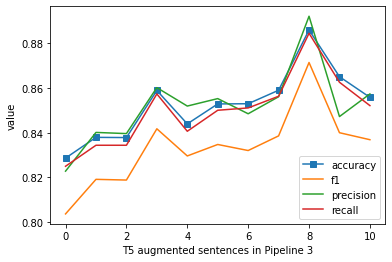

In [26]:
plt.plot(x,accuracy_p3,marker='s')
plt.plot(x,f1_p3)
plt.plot(x,precision_p3)
plt.plot(x,recall_p3)



plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 3')
# save('CV_pipe3.png')

Text(0.5, 0, 'T5 augmented sentences')

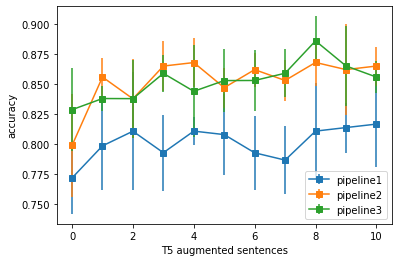

In [27]:
# Noraml T5 data


import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std1,accuracy_std2,accuracy_std3]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p1,yerr=accuracy_std1,marker='s')
plt.errorbar(x,accuracy_p2,yerr=accuracy_std2,marker='s')
plt.errorbar(x,accuracy_p3,yerr=accuracy_std3,marker='s')
# plt.plot(x,f1_p1)
# plt.plot(x,recall_p1)
# plt.plot(x,precision_p1)
plt.legend(["pipeline1","pipeline2","pipeline3"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('T5 augmented sentences')



In [28]:
t5_cv1=accuracy_p1
t5_cv2=accuracy_p2
t5_cv3=accuracy_p3

t5_cs1=accuracy_std1
t5_cs2=accuracy_std2
t5_cs3=accuracy_std3 


## Evaluate GPT3 augmenation 

In [9]:
import json
import numpy as np


In [10]:
accuracy_p1=[]
accuracy_p2=[]
accuracy_p3=[]
precision_p1=[]
precision_p2=[]
precision_p3=[]
f1_p1=[]
f1_p2=[]
f1_p3=[]
recall_p1=[]
recall_p2=[]
recall_p3=[]

for cv in range(1,6):
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  for i in range(1,4):
    for j in range(0,11):
# or you can insert your rasa test results by changing the path, here I am using my rasa test results
      with open('/content/ASOS_project_haoyang/gpt3_score/cv{}_gpt_p{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_bertcp{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_ucp{}_{}/intent_report.json'.format(cv,i,j)) as f:
        data = json.load(f)
        accuracy.append(data['accuracy'])
        precision.append(data['macro avg']['precision'])
        recall.append(data['macro avg']['recall'])
        f1.append(data['macro avg']['f1-score'])
  # append 1*5, get avg

  accuracy_p1.append(accuracy[0:11])
  accuracy_p2.append(accuracy[11:22])
  accuracy_p3.append(accuracy[22:])
  precision_p1.append(precision[0:11])
  precision_p2.append(precision[11:22])
  precision_p3.append(precision[22:])
  f1_p1.append(f1[0:11])
  f1_p2.append(f1[11:22])
  f1_p3.append(f1[22:])
  recall_p1.append(recall[0:11])
  recall_p2.append(recall[11:22])
  recall_p3.append(recall[22:])



In [11]:
# variance for accuracy 

accuracy_std1=np.std(np.array(accuracy_p1),axis=0)
accuracy_std2=np.std(np.array(accuracy_p2),axis=0)
accuracy_std3=np.std(np.array(accuracy_p3),axis=0)


In [12]:
accuracy_p1=np.sum(np.array(accuracy_p1),axis=0)/5
accuracy_p2=np.sum(np.array(accuracy_p2),axis=0)/5
accuracy_p3=np.sum(np.array(accuracy_p3),axis=0)/5
precision_p1=np.sum(np.array(precision_p1),axis=0)/5
precision_p2=np.sum(np.array(precision_p2),axis=0)/5
precision_p3=np.sum(np.array(precision_p3),axis=0)/5
f1_p1=np.sum(np.array(f1_p1),axis=0)/5
f1_p2=np.sum(np.array(f1_p2),axis=0)/5
f1_p3=np.sum(np.array(f1_p3),axis=0)/5
recall_p1=np.sum(np.array(recall_p1),axis=0)/5
recall_p2=np.sum(np.array(recall_p2),axis=0)/5
recall_p3=np.sum(np.array(recall_p3),axis=0)/5

In [13]:
# accuracy_o1=accuracy_p1[0]
# accuracy_o2=accuracy_p2[0]
# accuracy_o3=accuracy_p3[0]
# precision_o1=precision_p1[0]
# precision_o2=precision_p2[0]
# precision_o3=precision_p3[0]
# f1_o1
# f1_o2
# f1_o3 
# recall_o1
# recall_o2
# recall_o3

In [14]:
def save(name):
  from google.colab import files

   
  plt.savefig(name)
  files.download(name)

Test result

Text(0.5, 0, 'T5 augmented sentences in Pipeline 1')

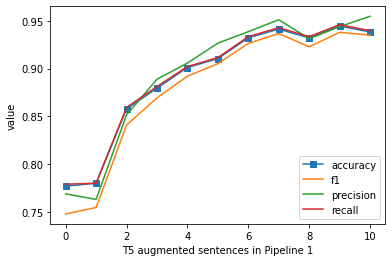

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)


plt.plot(x,accuracy_p1,marker='s')
plt.plot(x,f1_p1)
plt.plot(x,precision_p1)
plt.plot(x,recall_p1)


# plt.plot(x,f1_p1)
# plt.plot(x,recall_p1)
# plt.plot(x,precision_p1)
plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 1')
# save('CV_pipe1.png')

Text(0.5, 0, 'T5 augmented sentences in Pipeline 2')

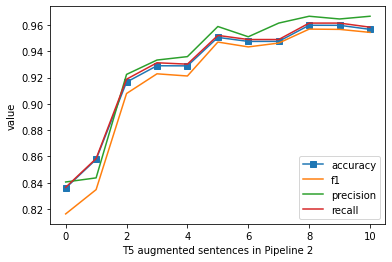

In [16]:
plt.plot(x,accuracy_p2,marker='s')
plt.plot(x,f1_p2)
plt.plot(x,precision_p2)
plt.plot(x,recall_p2)



plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 2')
# save('CV_pipe2.png')

Text(0.5, 0, 'T5 augmented sentences in Pipeline 3')

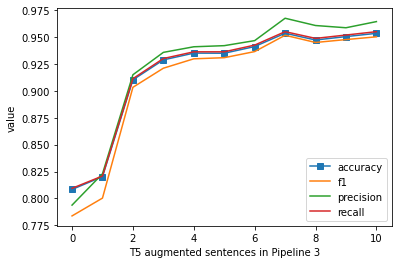

In [17]:
plt.plot(x,accuracy_p3,marker='s')
plt.plot(x,f1_p3)
plt.plot(x,precision_p3)
plt.plot(x,recall_p3)



plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 3')
# save('CV_pipe3.png')

Text(0.5, 0, 'T5 augmented sentences')

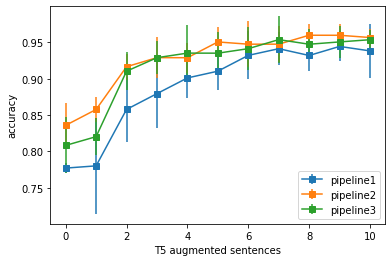

In [18]:
# Noraml GPT3 data


import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std1,accuracy_std2,accuracy_std3]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p1,yerr=accuracy_std1,marker='s')
plt.errorbar(x,accuracy_p2,yerr=accuracy_std2,marker='s')
plt.errorbar(x,accuracy_p3,yerr=accuracy_std3,marker='s')
# plt.plot(x,f1_p1)
# plt.plot(x,recall_p1)
# plt.plot(x,precision_p1)
plt.legend(["pipeline1","pipeline2","pipeline3"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('T5 augmented sentences')



## Visualize confident learning performance in T5 

read confidnet learning results for T5

In [72]:
accuracy_p1=[]
accuracy_p2=[]
accuracy_p3=[]
precision_p1=[]
precision_p2=[]
precision_p3=[]
f1_p1=[]
f1_p2=[]
f1_p3=[]
recall_p1=[]
recall_p2=[]
recall_p3=[]

for cv in range(1,6):
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  for i in range(1,4):
    for j in range(1,11):
# or you can insert your rasa test results by changing the path, here I am using my rasa test results
      with open('/content/ASOS_project_haoyang/T5_CL_hand_score/cv{}_cl_p{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_bertcp{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_ucp{}_{}/intent_report.json'.format(cv,i,j)) as f:
        data = json.load(f)
        accuracy.append(data['accuracy'])
        precision.append(data['macro avg']['precision'])
        recall.append(data['macro avg']['recall'])
        f1.append(data['macro avg']['f1-score'])
  # append 1*5, get avg

  accuracy_p1.append(accuracy[0:10])
  accuracy_p2.append(accuracy[10:20])
  accuracy_p3.append(accuracy[20:])
  precision_p1.append(precision[0:10])
  precision_p2.append(precision[10:20])
  precision_p3.append(precision[20:])
  f1_p1.append(f1[0:10])
  f1_p2.append(f1[10:20])
  f1_p3.append(f1[20:])
  recall_p1.append(recall[0:10])
  recall_p2.append(recall[10:20])
  recall_p3.append(recall[20:])



In [73]:
# variance for accuracy 

accuracy_std1=np.std(np.array(accuracy_p1),axis=0)
accuracy_std2=np.std(np.array(accuracy_p2),axis=0)
accuracy_std3=np.std(np.array(accuracy_p3),axis=0)


In [74]:
accuracy_p1=np.sum(np.array(accuracy_p1),axis=0)/5
accuracy_p2=np.sum(np.array(accuracy_p2),axis=0)/5
accuracy_p3=np.sum(np.array(accuracy_p3),axis=0)/5
precision_p1=np.sum(np.array(precision_p1),axis=0)/5
precision_p2=np.sum(np.array(precision_p2),axis=0)/5
precision_p3=np.sum(np.array(precision_p3),axis=0)/5
f1_p1=np.sum(np.array(f1_p1),axis=0)/5
f1_p2=np.sum(np.array(f1_p2),axis=0)/5
f1_p3=np.sum(np.array(f1_p3),axis=0)/5
recall_p1=np.sum(np.array(recall_p1),axis=0)/5
recall_p2=np.sum(np.array(recall_p2),axis=0)/5
recall_p3=np.sum(np.array(recall_p3),axis=0)/5

In [75]:
accuracy_p1 = np.insert(accuracy_p1, 0, t5_cv1[0], axis=0)
accuracy_p2 = np.insert(accuracy_p2, 0, t5_cv2[0], axis=0)
accuracy_p3 = np.insert(accuracy_p3, 0, t5_cv3[0], axis=0)
accuracy_std1 = np.insert(accuracy_std1, 0, t5_cs1[0], axis=0)
accuracy_std2 = np.insert(accuracy_std2, 0, t5_cs2[0], axis=0)
accuracy_std3 = np.insert(accuracy_std3, 0, t5_cs3[0], axis=0)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

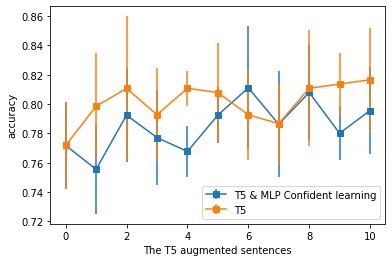

In [77]:
# Noraml T5 data


import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)

error=[accuracy_std1,t5_cs1]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p1,yerr=accuracy_std1,marker='s')
plt.errorbar(x,t5_cv1,yerr=t5_cs1,marker='s')


plt.legend(["T5 & MLP Confident learning","T5"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The T5 augmented sentences')

save('hand_CL_vs_T5_p1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

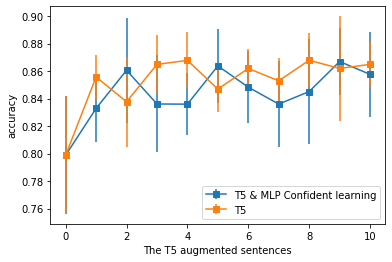

In [79]:
# Noraml T5 data


import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)

error=[accuracy_std1,t5_cs1]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p2,yerr=accuracy_std2,marker='s')
plt.errorbar(x,t5_cv2,yerr=t5_cs2,marker='s')


plt.legend(["T5 & MLP Confident learning","T5"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The T5 augmented sentences')

save('hand_CL_vs_T5_p2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

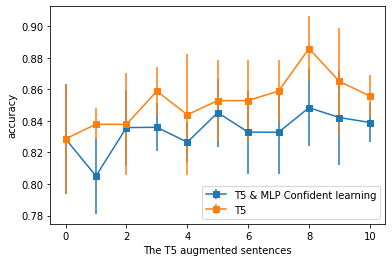

In [80]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)

error=[accuracy_std1,t5_cs1]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p3,yerr=accuracy_std3,marker='s')
plt.errorbar(x,t5_cv3,yerr=t5_cs3,marker='s')


plt.legend(["T5 & MLP Confident learning","T5"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The T5 augmented sentences')

save('hand_CL_vs_T5_p3.png')

## Visualize confident learning performance in GPT3 

In [9]:
cv1=accuracy_p1
cv2=accuracy_p2
cv3=accuracy_p3

cs1=accuracy_std1
cs2=accuracy_std2
cs3=accuracy_std3 



read confidnet learning results

In [10]:
accuracy_p1=[]
accuracy_p2=[]
accuracy_p3=[]
precision_p1=[]
precision_p2=[]
precision_p3=[]
f1_p1=[]
f1_p2=[]
f1_p3=[]
recall_p1=[]
recall_p2=[]
recall_p3=[]

for cv in range(1,6):
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  for i in range(1,4):
    for j in range(0,11):
# or you can insert your rasa test results by changing the path, here I am using my rasa test results
      with open('/content/ASOS_project_haoyang/gpt3_score/cl{}_gpt_p{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_bertcp{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_ucp{}_{}/intent_report.json'.format(cv,i,j)) as f:
        data = json.load(f)
        accuracy.append(data['accuracy'])
        precision.append(data['macro avg']['precision'])
        recall.append(data['macro avg']['recall'])
        f1.append(data['macro avg']['f1-score'])
  # append 1*5, get avg

  accuracy_p1.append(accuracy[0:11])
  accuracy_p2.append(accuracy[11:22])
  accuracy_p3.append(accuracy[22:])
  precision_p1.append(precision[0:11])
  precision_p2.append(precision[11:22])
  precision_p3.append(precision[22:])
  f1_p1.append(f1[0:11])
  f1_p2.append(f1[11:22])
  f1_p3.append(f1[22:])
  recall_p1.append(recall[0:11])
  recall_p2.append(recall[11:22])
  recall_p3.append(recall[22:])



In [11]:
# variance for accuracy 

accuracy_std1=np.std(np.array(accuracy_p1),axis=0)
accuracy_std2=np.std(np.array(accuracy_p2),axis=0)
accuracy_std3=np.std(np.array(accuracy_p3),axis=0)


In [12]:
accuracy_p1=np.sum(np.array(accuracy_p1),axis=0)/5
accuracy_p2=np.sum(np.array(accuracy_p2),axis=0)/5
accuracy_p3=np.sum(np.array(accuracy_p3),axis=0)/5
precision_p1=np.sum(np.array(precision_p1),axis=0)/5
precision_p2=np.sum(np.array(precision_p2),axis=0)/5
precision_p3=np.sum(np.array(precision_p3),axis=0)/5
f1_p1=np.sum(np.array(f1_p1),axis=0)/5
f1_p2=np.sum(np.array(f1_p2),axis=0)/5
f1_p3=np.sum(np.array(f1_p3),axis=0)/5
recall_p1=np.sum(np.array(recall_p1),axis=0)/5
recall_p2=np.sum(np.array(recall_p2),axis=0)/5
recall_p3=np.sum(np.array(recall_p3),axis=0)/5

In [13]:
accuracy_p1[0]=cv1[0]
accuracy_p2[0]=cv2[0]
accuracy_p3[0]=cv3[0]
accuracy_std1[0]=cs1[0]

accuracy_std2[0]=cs2[0]
accuracy_std3[0]=cs3[0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

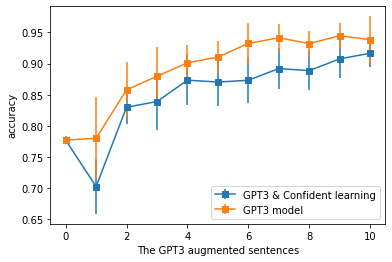

In [17]:
# Noraml GPT3 data
# compare clean lab with noraml

import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std1,cs1]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p1,yerr=accuracy_std1,marker='s')
plt.errorbar(x,cv1,yerr=cs1,marker='s')


plt.legend(["GPT3 & Confident learning","GPT3 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The GPT3 augmented sentences')

save('CL_vs_GPT3_p1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

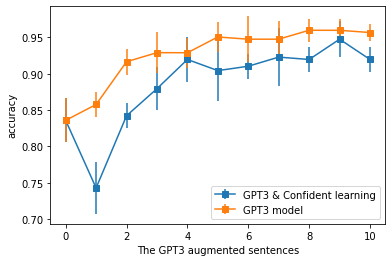

In [18]:
# Noraml T5 data
# compare clean lab with noraml

import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std2,cs2]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p2,yerr=accuracy_std2,marker='s')
plt.errorbar(x,cv2,yerr=cs2,marker='s')


plt.legend(["GPT3 & Confident learning","GPT3 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The GPT3 augmented sentences')

save('CL_vs_GPT3_p2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

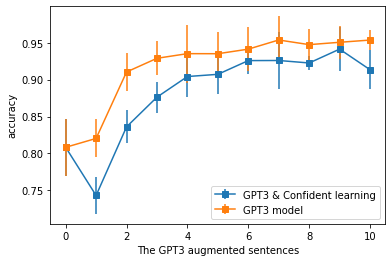

In [19]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std3,cs3]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p3,yerr=accuracy_std3,marker='s')
plt.errorbar(x,cv3,yerr=cs3,marker='s')


plt.legend(["GPT3 & Confident learning","GPT3 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The GPT3 augmented sentences')

save('CL_vs_GPT3_p3.png')

## Evaluate the performance between gpt3 model and T5 model in data augmenation

Read T5 results

In [20]:
accuracy_p1=[]
accuracy_p2=[]
accuracy_p3=[]
precision_p1=[]
precision_p2=[]
precision_p3=[]
f1_p1=[]
f1_p2=[]
f1_p3=[]
recall_p1=[]
recall_p2=[]
recall_p3=[]

for cv in range(1,6):
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  for i in range(1,4):
    for j in range(0,11):
# or you can insert your rasa test results by changing the path, here I am using my rasa test results
      with open('/content/ASOS_project_haoyang/rasa_test_output_for_T5/cv{}_fixedp{}_{}/intent_report.json'.format(cv,i,j)) as f:
    
        data = json.load(f)
        accuracy.append(data['accuracy'])
        precision.append(data['macro avg']['precision'])
        recall.append(data['macro avg']['recall'])
        f1.append(data['macro avg']['f1-score'])
  # append 1*5, get avg

  accuracy_p1.append(accuracy[0:11])
  accuracy_p2.append(accuracy[11:22])
  accuracy_p3.append(accuracy[22:])
  precision_p1.append(precision[0:11])
  precision_p2.append(precision[11:22])
  precision_p3.append(precision[22:])
  f1_p1.append(f1[0:11])
  f1_p2.append(f1[11:22])
  f1_p3.append(f1[22:])
  recall_p1.append(recall[0:11])
  recall_p2.append(recall[11:22])
  recall_p3.append(recall[22:])



In [21]:
# variance for accuracy 

accuracy_std1=np.std(np.array(accuracy_p1),axis=0)
accuracy_std2=np.std(np.array(accuracy_p2),axis=0)
accuracy_std3=np.std(np.array(accuracy_p3),axis=0)


In [22]:
accuracy_p1=np.sum(np.array(accuracy_p1),axis=0)/5
accuracy_p2=np.sum(np.array(accuracy_p2),axis=0)/5
accuracy_p3=np.sum(np.array(accuracy_p3),axis=0)/5
precision_p1=np.sum(np.array(precision_p1),axis=0)/5
precision_p2=np.sum(np.array(precision_p2),axis=0)/5
precision_p3=np.sum(np.array(precision_p3),axis=0)/5
f1_p1=np.sum(np.array(f1_p1),axis=0)/5
f1_p2=np.sum(np.array(f1_p2),axis=0)/5
f1_p3=np.sum(np.array(f1_p3),axis=0)/5
recall_p1=np.sum(np.array(recall_p1),axis=0)/5
recall_p2=np.sum(np.array(recall_p2),axis=0)/5
recall_p3=np.sum(np.array(recall_p3),axis=0)/5

In [24]:
accuracy_p1[0]=cv1[0]
accuracy_p2[0]=cv2[0]
accuracy_p3[0]=cv3[0]
accuracy_std1[0]=cs1[0]

accuracy_std2[0]=cs2[0]
accuracy_std3[0]=cs3[0]

In [ ]:
# accuracy_p1 is T5 result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

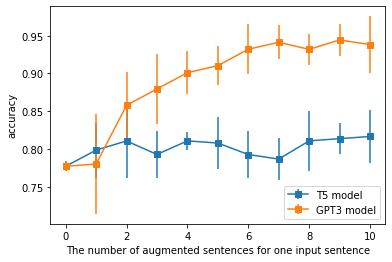

In [25]:
# Noraml GPT3 data
# compare clean lab with noraml

import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std1,cs1]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p1,yerr=accuracy_std1,marker='s')
plt.errorbar(x,cv1,yerr=cs1,marker='s')


plt.legend(["T5 model","GPT3 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The number of augmented sentences for one input sentence')

save('T5_vs_GPT3_p1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

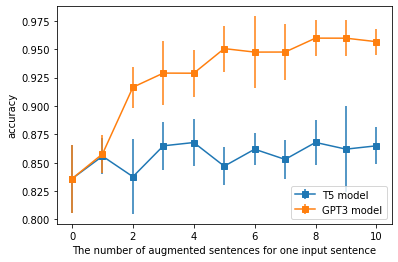

In [26]:
# Noraml T5 data
# compare clean lab with noraml

import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std2,cs2]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p2,yerr=accuracy_std2,marker='s')
plt.errorbar(x,cv2,yerr=cs2,marker='s')


plt.legend(["T5 model","GPT3 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The number of augmented sentences for one input sentence')

save('T5_vs_GPT3_p2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

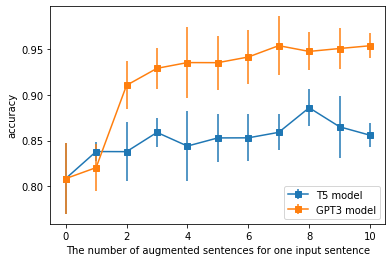

In [27]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std3,cs3]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p3,yerr=accuracy_std3,marker='s')
plt.errorbar(x,cv3,yerr=cs3,marker='s')


plt.legend(["T5 model","GPT3 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The number of augmented sentences for one input sentence')

save('T5_vs_GPT3_p3.png')

In [81]:
# # data size was copied from notebook code when I generate confident learning data

# data_size=[524, 784, 1035, 1301, 1548, 1796, 2054, 2298, 2548, 2788, 525, 773, 1035, 1286, 1554, 1805, 2058, 2305, 2567, 2811, 521, 784, 1044, 1304, 1562, 1819, 2087, 2330, 2579, 2831, 524, 781, 1037, 1297, 1553, 1816, 2064, 2329, 2574, 2816, 526, 779, 1037, 1289, 1555, 1806, 2076, 2318, 2572, 2803]
# data_size=np.split(np.array(data_size),5)


In [ ]:
# data_size

[array([ 524,  784, 1035, 1301, 1548, 1796, 2054, 2298, 2548, 2788]),
 array([ 525,  773, 1035, 1286, 1554, 1805, 2058, 2305, 2567, 2811]),
 array([ 521,  784, 1044, 1304, 1562, 1819, 2087, 2330, 2579, 2831]),
 array([ 524,  781, 1037, 1297, 1553, 1816, 2064, 2329, 2574, 2816]),
 array([ 526,  779, 1037, 1289, 1555, 1806, 2076, 2318, 2572, 2803])]

In [82]:
# import matplotlib.pyplot as plt
# import numpy as np
# x=np.arange(0,10)
# error=[num_std]
# # plt.plot(x,num_result)
# # plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
# plt.errorbar(x,num_result,yerr=num_std,marker='s')

# plt.legend(["size of dataset"],loc='lower right')
# plt.ylabel('the average amount of data for 5 files')
# plt.xlabel('T5 augmented sentences')

# for i,j in zip(x,num_result):
#   plt.annotate('{}'.format(j), (i,j), 
#                textcoords="offset points", 
#                  xytext=(0,10),
#                  ha='center')
# from google.colab import files

   
# plt.savefig('cl_data_size.png')
# files.download("cl_data_size.png")

NameError: ignored